In [10]:
# Computation of resistivity transform adapted from Koefoed (1970) by Ghosh (1971)
def resistivityTransform(resistivities, thicknesses) :
    # Number of layers (basement include):
    nLayers = len(resistivities)
    # Resistivity transforms:
    RT = []
#     RT.length = nSamples;
    
    T = []
#     T.length = nSamples - 1;
#     var index;
    K = (resistivities[nLayers-1] - resistivities[nLayers -2])/(resistivities[nLayers-1] + resistivities[nLayers-2])
    for i in range(nSamples):
        index = 0;
        
        T.append( resistivities[nLayers-2] * (1 + K * np.exp(-2*thicknesses[nLayers-2]/OA[i]))/(1 - K * np.exp(-2*thicknesses[nLayers-2]/OA[i])))
        for j in range(nLayers-3,-1,-1):
            Tab = resistivities[j]*(1-np.exp(-2*thicknesses[j]/OA[i]))/(1+np.exp(-2*thicknesses[j]/OA[i]));
#             index += 1;
            T.append((Tab+T[-1])/(1+Tab*T[-1]/(resistivities[j]*resistivities[j])));
        RT.append(T[-1]);
    
    return RT;


In [11]:
# // Compute apparent resistivity curve using Ghosh's linear filter.
# // Ghosh, D.P., 1971, Inverse filter coefficients for the computation of apparent resistivity, Geophysical Prospecting 19, 769-775
def ghoshFilter(resistivities, thicknesses):
#     // Filter coefficients
    b = [0.0225,-0.0499,0.1064,0.1854,1.9720,-1.5716,0.4018,-0.0814,0.0148]
    
#     // Compute resistivity transform
    RT = resistivityTransform(resistivities, thicknesses);
    
#     // Compute apparent resistivities
    apparentResisitivies = [];
    apparentResisitivies = np.zeros(nSamples);
    for i in range( 10,38):
        apparentResisitivies[i] = 0;
        for j in range(-3,6):
            apparentResisitivies[i] += b[j+3]*RT[i-j*2]
    return apparentResisitivies


def getApparentResisityCurve(resistivities, thicknesses):
    
    appRes = ghoshFilter(resistivities, thicknesses);
    
    apparentResistivities = [];
    halfSpacing = [];
    
    for i in range(13,36):
        apparentResistivities.append(appRes[i]);
        halfSpacing.append(OA[i]);
    
    
    return halfSpacing, apparentResistivities;


In [13]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
# Number of samples:
nSamples = 44;
# AB/2 spacing:
OA =     [0.0139790406440197, 0.0205184256193513, 0.0301169300968417, 0.0442056079391693, 0.0648849589579011, 0.0952380952380952, 0.139790406440197, 0.205184256193513, 0.301169300968417, 0.442056079391693, 0.648849589579011, 0.952380952380952, 1.39790406440197, 2.05184256193513, 3.01169300968417, 4.42056079391693, 6.48849589579011, 9.52380952380952, 13.9790406440197, 20.5184256193513, 30.1169300968417, 44.2056079391693, 64.8849589579011, 95.2380952380952, 139.790406440197, 205.184256193513, 301.169300968417, 442.056079391693, 648.849589579011, 952.380952380952, 1397.90406440197, 2051.84256193513, 3011.69300968417, 4420.56079391693, 6488.49589579011, 9523.80952380952, 13979.0406440197, 20518.4256193513, 30116.9300968417, 44205.6079391693, 64884.9589579011, 95238.0952380952, 139790.406440197, 205184.256193513];



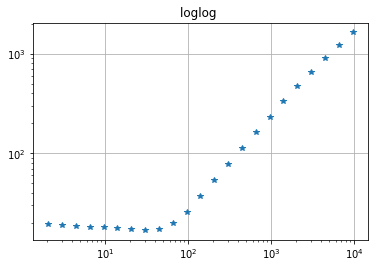

In [23]:

resistivities=[20,18,13,4500]
thicknesses=[1.2,12,40]
dist,ares=getApparentResisityCurve(resistivities, thicknesses)
# plt.plot(dist,ares)
plt.subplots_adjust(hspace=0.4)

# log x and y axis
plt.subplot(111)
plt.loglog(dist,ares,'*', basex=10)
plt.grid(True)
plt.title('loglog ')

In [33]:
y=np.diff(np.log(OA))[0]
y
u=np.exp(y)
y,u,np.log(u)

(0.38376418216567654, 1.4677992676220728, 0.38376418216567648)